<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/operations_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mass Analysis

## Uploading necessary packages

In [ ]:
#Uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Creating a copy of dataframe
df1 = df.copy()

In [ ]:
#Checking if all event values are unique (no duplicates)
df1['Event'].is_unique

True

In [ ]:
#Dropping shutdown rows and blank rows
prod = df1[~df1['T_loss'].isin(['Shutdown', np.nan])].copy()
prod.index

DatetimeIndex(['2021-01-04', '2021-01-04', '2021-01-04', '2021-01-04',
               '2021-01-04', '2021-01-04', '2021-01-04', '2021-01-04',
               '2021-01-04', '2021-01-04',
               ...
               '2021-03-04', '2021-03-04', '2021-03-05', '2021-03-05',
               '2021-03-05', '2021-03-05', '2021-03-05', '2021-03-05',
               '2021-03-05', '2021-03-05'],
              dtype='datetime64[ns]', name='Date', length=1039, freq=None)

In [ ]:
#Checking the new dataframe info
prod.info()

## Mass EDA

In [ ]:
#Groupying by mass 
mass = prod.groupby(['Mass'])['GE'].mean().reset_index().round(2)
mass

,Mass,GE
0,Norsk,64.63
1,Svensk,67.06


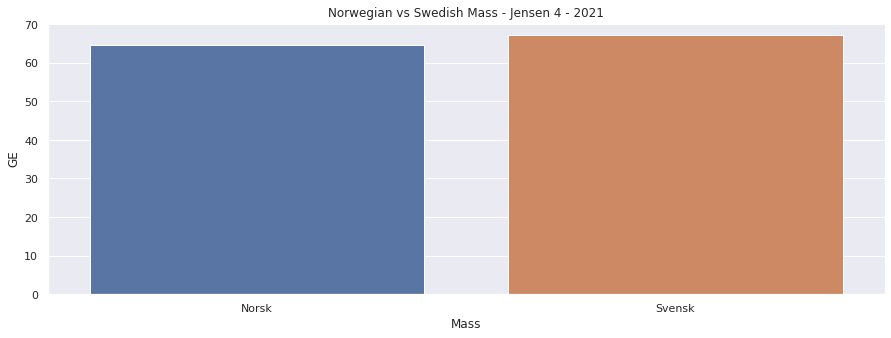

In [ ]:
#Plotting the overall mass comparison in GE
sns.barplot(x='Mass', y='GE', data=mass, )
plt.title('Norwegian vs Swedish Mass - Jensen 4 - 2021')
plt.show()

In [ ]:
#Groupying by mass and group type  
group = prod.groupby(['Mass', 'Group'])['GE'].mean().reset_index().round(2)
group

,Mass,Group,GE
0,Norsk,Fylte,59.64
1,Norsk,Ingredienser,53.65
2,Norsk,Løsvekt,59.61
3,Norsk,Massive,76.19
4,Svensk,Ingredienser,62.44
5,Svensk,Massive,71.70


In [ ]:
#Groupying by mass, group and format  
format = prod.groupby(['Mass', 'Group', 'Format']).agg({'Hours': 'count', 'GE': 'mean'}).reset_index().round(2)
format

In [ ]:
#Groupying by mass, group and format  
product = prod.groupby(['Mass', 'Group', 'Format', 'Product']).agg({'Hours': 'count', 'GE': 'mean'}).reset_index().round(2)
product

In [ ]:
#Exporting to excel into local disk
from google.colab import files
product.to_excel('product_grouped.xlsx')
files.download('product_grouped.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Sanitation Analysis

## Uploading necessary packages

In [ ]:
#Remove previous versions of the uploaded excel file
!rm production_j4_2021.xlsx

In [ ]:
#Uploading file from local drive ==> !rm file
from google.colab import files
uploaded = files.upload()

Saving production_j4_2021.xlsx to production_j4_2021.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['production_j4_2021.xlsx']), index_col='Event') #==> setting Event (datetime) as index to perform date slicing

In [ ]:
#Checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2088 entries, 2021-01-01 00:00:00 to 2021-03-28 23:00:00
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2088 non-null   datetime64[ns]
 1   Hours      2088 non-null   object        
 2   Weeknum    2088 non-null   int64         
 3   Weekday    2088 non-null   object        
 4   Shift      2088 non-null   object        
 5   S_num      1331 non-null   float64       
 6   State      2000 non-null   object        
 7   T_loss     2000 non-null   object        
 8   Mass       1278 non-null   object        
 9   Group      1278 non-null   object        
 10  Product    1278 non-null   object        
 11  Format     1278 non-null   object        
 12  Team       1303 non-null   object        
 13  XO_num     157 non-null    float64       
 14  XO_cat     157 non-null    object        
 15  XO_type    157 non-null    object        
 16  FTE_lo

In [ ]:
#Checking the dataframe index
df.index[0], df.index[-1]

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-03-28 23:00:00'))

In [ ]:
#Checking the dataframe columns
df.columns

Index(['Date', 'Hours', 'Weeknum', 'Weekday', 'Shift', 'S_num', 'State',
       'T_loss', 'Mass', 'Group', 'Product', 'Format', 'Team', 'XO_num',
       'XO_cat', 'XO_type', 'FTE_loss', 'Form_min', 'A1764', 'PK2219',
       'PK2845', 'PK4553', 'Schubert', 'K6316', 'TP6839', 'Boxes', 'GE',
       'GE_loss', 'Min_loss', 'Machine', 'Workpoint', 'Comment'],
      dtype='object')

## Data slicing and preparation

In [ ]:
#Filtering the dataframe to exclude Non operating time and no shift
df = df[~df['State'].isin(['2_Legal_NOT', '3_No_Shift'])]
df = df.drop(columns = ['XO_num', 'XO_cat', 'XO_type', 'FTE_loss', 'Form_min', 'A1764', 'PK2219', 'PK2845','PK4553', 'Schubert', 'K6316', 'TP6839', 'Machine', 'Workpoint'], axis = 1)
df.head(2)

In [ ]:
#Filtering the dataframe to select only Sanitation activities
df_sn = df[df['State'].isin(['8_Sanitation'])].copy()
df_sn.tail(2)

In [ ]:
#Filtering the dataframe to match the desired time slice
s = '2021-01-04 07:00:00'
f = '2021-03-23 07:00:00'
sn = df_sn[s : f].copy()
sn.reset_index(inplace = True)
sn['Event'].iloc[-1]

Timestamp('2021-03-23 07:00:00')

In [ ]:
#Checking the dataframe information
sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Event     146 non-null    datetime64[ns]
 1   Date      146 non-null    datetime64[ns]
 2   Hours     146 non-null    object        
 3   Weeknum   146 non-null    int64         
 4   Weekday   146 non-null    object        
 5   Shift     146 non-null    object        
 6   S_num     146 non-null    float64       
 7   State     146 non-null    object        
 8   T_loss    146 non-null    object        
 9   Mass      121 non-null    object        
 10  Group     121 non-null    object        
 11  Product   121 non-null    object        
 12  Format    121 non-null    object        
 13  Team      146 non-null    object        
 14  Boxes     121 non-null    float64       
 15  GE        146 non-null    float64       
 16  GE_loss   146 non-null    float64       
 17  Min_loss  146 no

In [ ]:
#Dropping rows where monthly cleaning was performed
sn = sn[~sn['Mass'].isin([np.nan])]
sn.reset_index(drop=True, inplace=True)
sn.tail(2)

In [ ]:
#Checking final dataframe columns
sn.columns

Index(['Event', 'Date', 'Hours', 'Weeknum', 'Weekday', 'Shift', 'S_num',
       'State', 'T_loss', 'Mass', 'Group', 'Product', 'Format', 'Team',
       'Boxes', 'GE', 'GE_loss', 'Min_loss', 'Comment'],
      dtype='object')

In [ ]:
#Manipulating datetime to create categories from hours column
sn = sn.assign(Hours = lambda x: x['Hours'].astype(str).str[:2]) #==> assign type string and use pandas.Series.str on the fly to slice the first 2 char..
sn.tail()

## Sanitation EDA

In [ ]:
#Value counts of Categorical Hours
sn_vc = sn.value_counts(subset=['Hours'], normalize=True).reset_index(name='Proportion')
sn_vc

,Hours,Proportion
0,15,0.330579
1,07,0.280992
2,23,0.247934
3,22,0.066116
4,17,0.016529
5,18,0.008264
6,16,0.008264
7,14,0.008264
8,13,0.008264
9,12,0.008264


In [ ]:
#Groupying by customized aggregation
sn_gp = sn.groupby(['Hours']).agg({'Event': 'count', 'GE': 'mean', 'GE_loss': 'mean','Min_loss': 'sum'}).reset_index().sort_values(by='Min_loss', ascending=False)
sn_gp = sn_gp.assign(Perc = lambda x: x['Min_loss']/x['Min_loss'].sum())
sn_gp

,Hours,Event,GE,GE_loss,Min_loss,Perc
6,15,40,45.041578,54.958422,1319.002133,0.412484
1,07,34,60.568707,39.431293,804.398380,0.251555
11,23,30,79.092664,20.907336,376.332040,0.117688
10,22,8,67.088453,32.911547,157.975426,0.049403
8,17,2,0.000000,100.000000,120.000000,0.037527
0,06,1,0.000000,100.000000,60.000000,0.018763
2,11,1,0.000000,100.000000,60.000000,0.018763
3,12,1,0.000000,100.000000,60.000000,0.018763
4,13,1,0.000000,100.000000,60.000000,0.018763
5,14,1,0.000000,100.000000,60.000000,0.018763


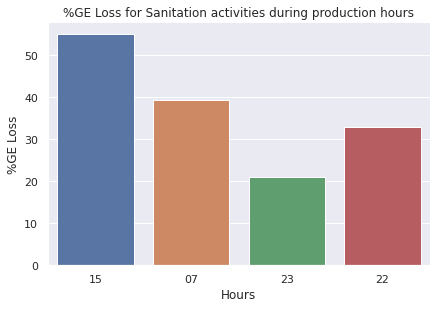

In [ ]:
#Plotting the hours loss vs each hour of the day
sns.catplot(x='Hours', y='GE_loss', data=sn_gp.head(4), ci=False, kind='bar', height=4, aspect=1.5)
plt.title('%GE Loss for Sanitation activities during production hours')
plt.xlabel('Hours'), plt.ylabel('%GE Loss')
plt.show()

In [ ]:
#Exporting to excel into local disk
from google.colab import files
xo_gp.to_excel('c_over_group_2021.xlsx', index=False) #==> Excluding index from file
files.download('c_over_group_2021.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Planned Stop EDA (Bonus)

In [ ]:
#Filtering the dataframe to match Planned Stops activities
df_ps = df[df['State'].isin(['10_Planned_Stop'])].copy()

In [ ]:
#Value counts of Categorical Hours
plan = df_ps.value_counts(subset=['Hours'], normalize=True).reset_index(name='Proportion')
plan

,Hours,Proportion
0,04:00:00,0.464286
1,09:00:00,0.357143
2,03:00:00,0.071429
3,16:00:00,0.035714
4,15:00:00,0.035714
5,02:00:00,0.035714


# Stoppages EDA

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving mod4_Tracker_2021.xlsx to mod4_Tracker_2021.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
tracker = pd.read_excel(io.BytesIO(uploaded['mod4_Tracker_2021.xlsx']))

In [ ]:
#Checking the dataframe information and data types
tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         150 non-null    datetime64[ns]
 1   Month        150 non-null    int64         
 2   Shift        150 non-null    object        
 3   Group        150 non-null    object        
 4   Product      150 non-null    object        
 5   Format       150 non-null    object        
 6   Name         150 non-null    object        
 7   Start        150 non-null    object        
 8   Last seen    150 non-null    object        
 9   Machine      150 non-null    object        
 10  Work Point   150 non-null    object        
 11  Min          150 non-null    float64       
 12  Observation  133 non-null    object        
 13  Solution     19 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 16.5+ KB


In [ ]:
#Creating a reduction of the higher stoppages by Machine
tracker[['Machine', 'Min']].groupby('Machine').sum().sort_values(by=['Min'], ascending=False)

,Min
Machine,
Moulding_line,5942.811372
Choco_process_area,1410.000000
Two_pack_Flow_pack,800.000000
Packaging_machine_2,456.000000
Two_pack_Lid_applicator,424.000000
Packaging_machine_1,299.880000
Palletizer,140.000000
Single_CW,90.000000
Single_Case_erector,80.000000


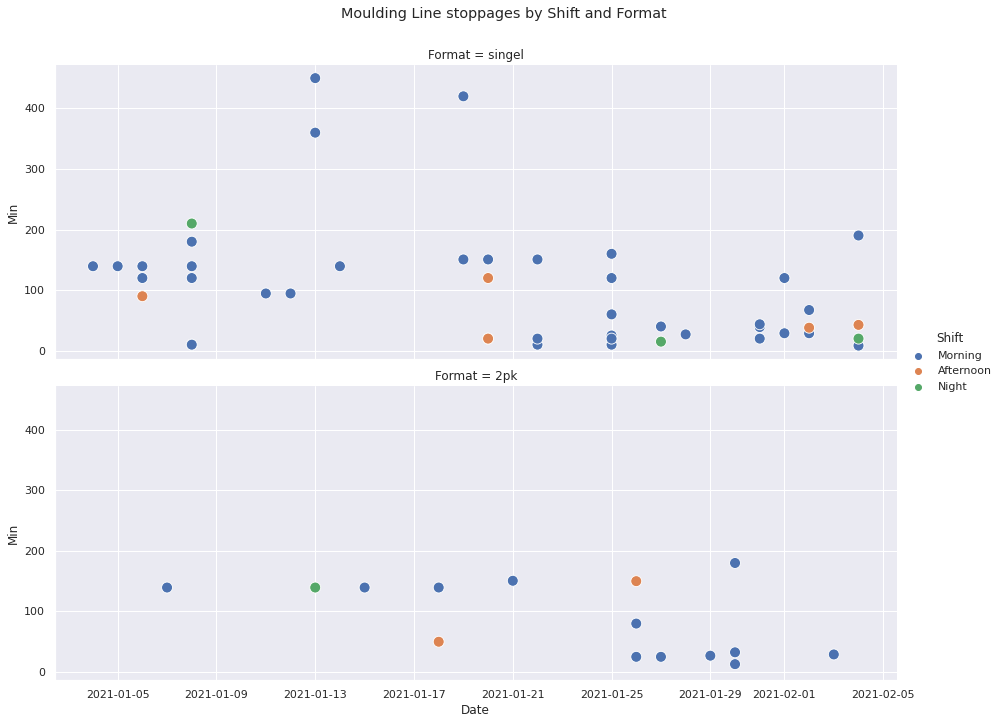

In [ ]:
#Checking the stoppages by machine and shift
g8 = sns.relplot(x='Date', y='Min', data=tracker[tracker['Machine'] == 'Moulding_line'], hue='Shift', row='Format', s=120, aspect=2.5)
plt.subplots_adjust(top=0.90)
g8.fig.suptitle('Moulding Line stoppages by Shift and Format')
plt.show()

In [ ]:
%pwd

'/content'

In [ ]:
%timeit range(1000)

The slowest run took 12.27 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 217 ns per loop


#GE Analysis

##Uploading data

In [ ]:
#Import scipy
from scipy.stats import linregress

In [ ]:
#Remove previous versions of the uploaded excel file
!rm 2021_j4_grouped.xlsx

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving 2021_j4_grouped.xlsx to 2021_j4_grouped.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
j4g = pd.read_excel(io.BytesIO(uploaded['2021_j4_grouped.xlsx']))

In [ ]:
#Checking the dataframe info
j4g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      295 non-null    datetime64[ns]
 1   Variant   295 non-null    int64         
 2   Weeknum   295 non-null    int64         
 3   S_num     295 non-null    int64         
 4   Shift     295 non-null    object        
 5   Mass      295 non-null    object        
 6   Group     295 non-null    object        
 7   Product   295 non-null    object        
 8   Format    295 non-null    object        
 9   Form_min  295 non-null    float64       
 10  Hours     295 non-null    int64         
 11  Boxes     295 non-null    int64         
 12  GE        295 non-null    float64       
 13  GE_loss   295 non-null    float64       
 14  Min_loss  295 non-null    float64       
 15  A1764     295 non-null    float64       
 16  PK2219    295 non-null    float64       
 17  PK2845    295 no

##GE EDA

In [ ]:
#Groupby week and average GE
ge_df = j4g.groupby(['Weeknum']).agg({'GE': 'mean'}).reset_index()
ge_df.head()

,Weeknum,GE
0,1,64.451239
1,2,55.148831
2,3,58.820926
3,4,57.359118
4,5,55.653599


In [ ]:
#Create a function to predict GE to the end of the year
def ge_plot():
  
  #Create arrays for plotting
  x = np.array(ge_df['Weeknum'])
  y = np.array(ge_df['GE'])
  
  #Create scatter plot
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
  ax.scatter(x, y, label='scatter')
  
  #Create first line of best fit
  x_52 = np.arange(1, 52)
  lreg_1 = linregress(x, y)
  lreg_52 = 'fitted-line: ' + str(round((lreg_1.slope*52 + lreg_1.intercept),1))
  ax.plot(x_52, lreg_1.slope*x_52 + lreg_1.intercept, 'r' , label=lreg_52)

  #Add labels and title
  ax.set_title('2021 J4 GE by Weeknum')
  ax.set_xlabel('Weeknum')
  ax.set_ylabel('Average GE%')
  ax.xaxis.set_ticks(np.arange(1, 52, 1))
  ax.yaxis.set_ticks(np.arange(0, 100, 5))
  ax.legend()

  return fig

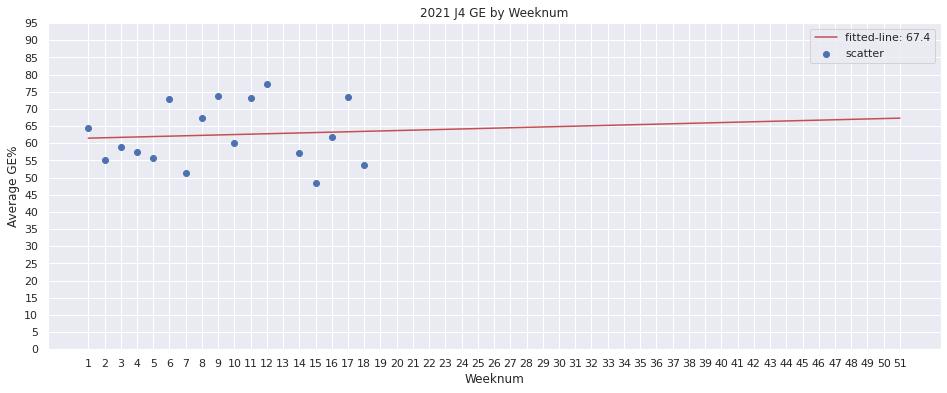

In [ ]:
#Call the function and draw the scatter plot to predict sea level
ge_plot()
plt.show()

#Lost volume (packing from grey boxes)



## Uploading necessary packages

In [ ]:
#Remove previous versions of the uploaded excel file
!rm 2021_j4_pakker_fra_kasser.xlsx

In [ ]:
#Uploading file from local drive ==> !rm file
from google.colab import files
uploaded5 = files.upload()

Saving 2021_j4_pakker_fra_kasser.xlsx to 2021_j4_pakker_fra_kasser.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df5 = pd.read_excel(io.BytesIO(uploaded5['2021_j4_pakker_fra_kasser.xlsx']))

In [ ]:
#Checking the dataframe information
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Event     132 non-null    datetime64[ns]
 1   Year      132 non-null    int64         
 2   Month     132 non-null    object        
 3   Weeknum   132 non-null    int64         
 4   Weekday   132 non-null    object        
 5   Shift     132 non-null    object        
 6   S_num     124 non-null    float64       
 7   State     132 non-null    object        
 8   T_loss    132 non-null    object        
 9   Mass      132 non-null    object        
 10  Group     132 non-null    object        
 11  Product   132 non-null    object        
 12  Format    132 non-null    object        
 13  Form_min  132 non-null    int64         
 14  Boxes     132 non-null    int64         
 15  GE        132 non-null    float64       
 16  GE_loss   132 non-null    float64       
 17  Min_loss  132 no

In [ ]:
#Checking the dataframe index
df5.Event[0], df5.Event.iloc[-1]

(Timestamp('2021-01-07 19:00:00'), Timestamp('2021-05-27 06:00:00'))

##EDA Molding line stoppages

In [ ]:
grey_df = df5.groupby(['Weeknum', 'Form_min', 'Comment']).agg({'Min_loss': 'count'}).reset_index()
grey_df = grey_df.rename(columns={'Min_loss': 'Lost_hours'})
grey_df = grey_df.assign(Lost_kg = grey_df['Lost_hours']*3799)
grey_df = grey_df.assign(Lost_cost = grey_df['Lost_hours']*920)
grey_df = grey_df.assign(Cum_cost = grey_df['Lost_cost'].cumsum())
grey_df

,Weeknum,Form_min,Comment,Lost_hours,Lost_kg,Lost_cost,Cum_cost
0,1,0,"Stopp anlegget, pakker fra kasser",6,22794,5520,5520
1,2,0,"Stopp anlegget, pakker fra kasser",7,26593,6440,11960
2,3,0,"Stopp anlegget, pakker fra kasser",5,18995,4600,16560
3,4,0,"Stopp anlegget, pakker fra kasser",19,72181,17480,34040
4,5,0,"Stopp anlegget, pakker fra kasser",7,26593,6440,40480
5,6,0,"Stopp anlegget, pakker fra kasser",4,15196,3680,44160
6,7,0,"Stopp anlegget, pakker fra kasser",23,87377,21160,65320
7,8,0,"Stopp anlegget, pakker fra kasser",3,11397,2760,68080
8,9,0,"Stopp anlegget, pakker fra kasser",3,11397,2760,70840
9,10,0,"Stopp anlegget, pakker fra kasser",13,49387,11960,82800


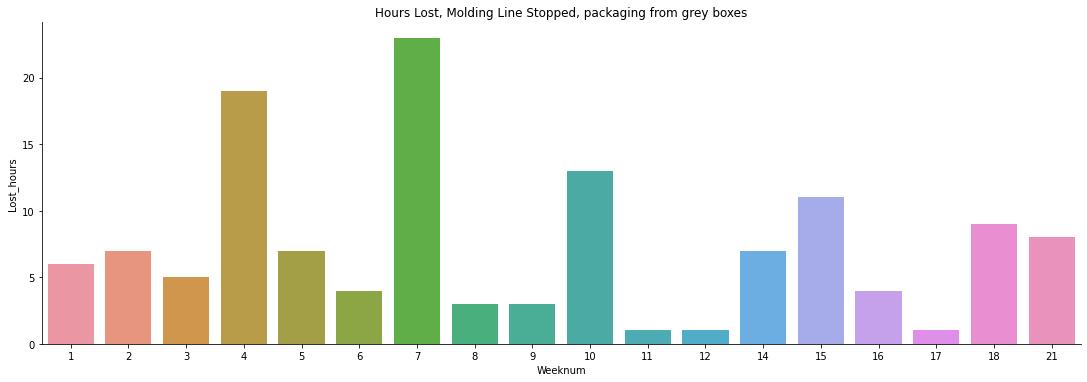

In [ ]:
#Plotting the lost hours by each week
sns.catplot(x='Weeknum', y='Lost_hours', data=grey_df, kind='bar', height=5, aspect=3)
plt.title('Hours Lost, Molding Line Stopped, packaging from grey boxes')
plt.show()

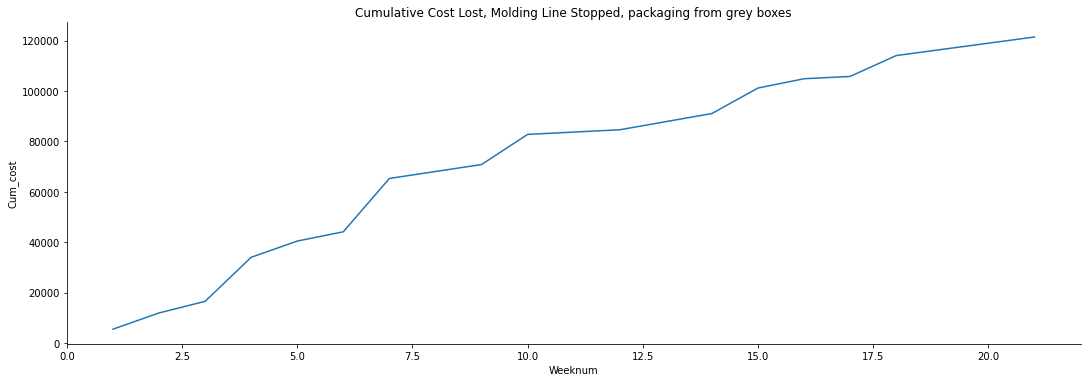

In [ ]:
#Plotting the cumulative cost loss
sns.relplot(x='Weeknum', y='Cum_cost', data=grey_df, kind='line', height=5, aspect=3)
plt.title('Cumulative Cost Lost, Molding Line Stopped, packaging from grey boxes')
plt.show()

In [ ]:
#Exporting to excel into local disk
from google.colab import files
grey_df.to_excel('grey_boxes_j4.xlsx', index=False) #==> Excluding index from file
files.download('grey_boxes_j4.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Sugar syrup analytics

## Uploading necessary packages

In [ ]:
#Uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (8, 4)})

In [ ]:
#Remove previous versions of the uploaded excel file
!rm 2021_sugar_syrup_data.xlsx

In [ ]:
#Uploading file from local drive ==> !rm file
from google.colab import files
uploaded6 = files.upload()

Saving 2021_sugar_syrup_data.xlsx to 2021_sugar_syrup_data.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df6 = pd.read_excel(io.BytesIO(uploaded6['2021_sugar_syrup_data.xlsx']))

In [ ]:
#Checking the dataframe info
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Event            92 non-null     datetime64[ns]
 1   Year             92 non-null     int64         
 2   Month            92 non-null     object        
 3   Weeknum          92 non-null     int64         
 4   Weekday          92 non-null     object        
 5   Driamix_varming  92 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.4+ KB


##Data manipulation

In [ ]:
#Creating categorical values for multi-variate analysis
df6 = df6.assign(Team = np.where((df6['Event'].dt.day)<25, 'Team_1', 'Team_2'),
                 Shift = np.where((df6['Event'].dt.hour)<12, 'Day', 'Afternoon'),
                 Hour = df6['Event'].dt.hour)
df6.head(3)

,Event,Year,Month,Weeknum,Weekday,Driamix_varming,Team,Shift,Hour
0,2021-10-17 08:00:00,2021,October,41,Sunday,86,Team_1,Day,8
1,2021-10-17 09:00:00,2021,October,41,Sunday,88,Team_1,Day,9
2,2021-10-17 09:30:00,2021,October,41,Sunday,86,Team_1,Day,9


##Multi-variate Analysis

In [ ]:
#Creating list of categories
var_list = ['Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Hour']
var_list

['Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Hour']

In [ ]:
#Inspecting the proportion of data for different categories
@interact(Cat=var_list)
def proportion(Cat):
  return df6.value_counts(subset=Cat, normalize=True).reset_index(name='Proportion')

interactive(children=(Dropdown(description='Cat', options=('Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Ho…

In [ ]:
#Creating interactive visualization
@interact(Cat=var_list, Shift=['Shift', 'Team', None])
def plot_multi_variate(Cat, Shift):
  sns.boxplot(x=Cat, y='Driamix_varming', data=df6, hue=Shift)
  plt.title('Sugar Syrup Multi-variate Analysis')
  plt.legend(bbox_to_anchor=(1.25, 1)) #==> Set legend outside the chart
  plt.show()

interactive(children=(Dropdown(description='Cat', options=('Month', 'Weeknum', 'Weekday', 'Team', 'Shift', 'Ho…

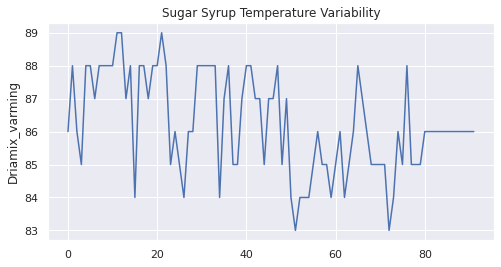

In [ ]:
#Plotting a scatter plot of the warming temperature
sns.lineplot(x=df6.index, y='Driamix_varming', data=df6)
plt.title('Sugar Syrup Temperature Variability')
plt.show()

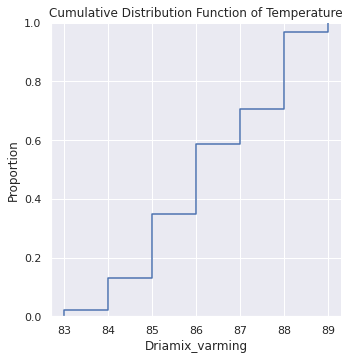

In [ ]:
#Plotting the Cumulative Distribution Function of the warming temperature
sns.displot(x='Driamix_varming', data=df6, kind='ecdf')
plt.title('Cumulative Distribution Function of Temperature')
plt.show()

#Kaizen KPIs

## Uploading necessary packages

In [ ]:
#Upgrading Plotly
!pip install plotly --upgrade

In [1]:
#Uploading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact

In [14]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (10, 5)})

In [ ]:
#Remove previous versions of the uploaded excel file
!rm kaizen_db.xlsx

In [ ]:
#Uploading file from local drive ==> !rm file
from google.colab import files
uploaded7 = files.upload()

In [4]:
#Storing dataset in a Pandas Dataframe
import io
df7 = pd.read_excel(io.BytesIO(uploaded7['kaizen_db.xlsx']))

In [5]:
#Checking the dataframe info
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           91 non-null     int64         
 1   Dato         91 non-null     datetime64[ns]
 2   Navn         91 non-null     object        
 3   Linje        91 non-null     object        
 4   Område       91 non-null     object        
 5   SGA_team     91 non-null     object        
 6   Beskrivelse  91 non-null     object        
 7   Løsning      91 non-null     object        
 8   Kriterier    91 non-null     object        
 9   Trinn        91 non-null     object        
 10  Kommentar    62 non-null     object        
 11  Ferdig       32 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 8.7+ KB


##Data manipulation

In [6]:
#Creating categories from datetime
df7 = df7.assign(Year = df7['Dato'].dt.year,
                 Month = df7['Dato'].dt.month_name(),
                 Weeknum = df7['Dato'].dt.isocalendar().week)

In [7]:
#Creating list of categories
year_list = list(df7['Year'].unique())
#month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'Jul', 'August', 'September', 'October', 'Novemeber', 'December']
month_list = list(df7['Month'].unique())
line_list = list(df7['Linje'].unique())
sga_list = list(sorted(df7['SGA_team'].unique()))
cat_list = list(sorted(df7['Trinn'].unique(), reverse=True))

##Kaizens by Line and Year

In [8]:
#Creating interactive visualization
@interact(Year=year_list, Line=line_list, Cat=cat_list)
def plot_kaizen_by_year(Year, Line, Cat):
  df = df7[(df7['Year']==Year) & (df7['Linje']==Line) & (df7['Trinn']==Cat)].copy()
  sns.countplot(x='Month', data=df, order=month_list, palette='Set3')
  plt.title(f'{Year} - Line: {Line} - Implemented Kaizens per Month')
  plt.yticks(np.arange(0, 16, 2))
  plt.axhline(8, color='purple', linestyle='-')
  plt.show()

interactive(children=(Dropdown(description='Year', options=(2021,), value=2021), Dropdown(description='Line', …

##Kaizen by Month and SGA

In [12]:
#Creating interactive visualization
@interact(Year=year_list, Line=line_list, Cat=cat_list)
def plot_kaizen_month_sga(Year, Line, Cat):
  df = df7[(df7['Year']==Year) & (df7['Linje']==Line) & (df7['Trinn']==Cat)].copy()
  sns.countplot(x='Month', data=df, order=month_list, hue='Kriterier', palette='Set3')
  plt.title(f'{Year} - Line: {Line} - Kaizens per month and Category')
  plt.yticks(np.arange(0, 8, 1))
  #plt.axhline(2, color='purple', linestyle='-')
  plt.xticks(rotation=30)
  plt.legend(bbox_to_anchor=(1.05, 1)) #==> Set legend outside the chart
  plt.show()

interactive(children=(Dropdown(description='Year', options=(2021,), value=2021), Dropdown(description='Line', …

##Kaizen Engagement by SGA

In [15]:
#Creating interactive visualization
@interact(Year=year_list, Line=line_list, SGA=sga_list, Cat=cat_list)
def plot_kaizen_sga(Year, Line, SGA, Cat):
  df = df7[(df7['Year']==Year) & (df7['Linje']==Line) & (df7['SGA_team']==SGA) & (df7['Trinn']==Cat)].copy()
  sns.countplot(x='Navn', data=df, palette='Set3')
  plt.title(f'{Year} - {Line} Implemented Kaizens & Engagement by SGA: {SGA}')
  plt.yticks(np.arange(0, 10, 1))
  plt.axhline(6, color='purple', linestyle='-')
  plt.xticks(rotation=30)
  #plt.legend(bbox_to_anchor=(1.25, 1)) #==> Set legend outside the chart
  plt.show()

interactive(children=(Dropdown(description='Year', options=(2021,), value=2021), Dropdown(description='Line', …